<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.dummy import DummyRegressor # high bias model

df = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv') 

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [2]:
df.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.info() # no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [4]:
df.shape # 985 rows with 12 features

(985, 12)

In [5]:
df.describe() # some weird values

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [6]:
print(df['sq__ft'].skew()) # approx. normal --> mean could be use to replace
print(df['baths'].skew())# approx. normal --> mean could be use to replace
print(df['beds'].skew())# approx. normal, a bit left skew --> not much diff. in mean and median

0.5084812340717079
-0.2361314994998725
-0.7947803031047176


In [7]:
# replace 0 in baths,beds,sq__ft columns
#df['baths'] = df['baths'].replace(to_replace=0,value=round(df['baths'].mean(),0))
#df['beds'] = df['beds'].replace(to_replace=0,value=round(df['beds'].mean(),0))
#df['sq__ft'] = df['sq__ft'].replace(to_replace=0,value=round(df['sq__ft'].mean(),0))


In [8]:
# replace minus sign in sq__ft column
df['sq__ft'] = df['sq__ft'].replace(to_replace=-984,value=984)
# remove minus sign from longtitude column
df['longitude'] = df['longitude'].apply(lambda x : np.abs(x))
# remove minus sign from latitude column
df['latitude'] = df['latitude'].apply(lambda x : np.abs(x))
# remove minus sign from price column
df['price'] = df['price'].apply(lambda x : np.abs(x))

In [9]:
# switch the wrong coordinates
df['longitude'] = df['longitude'].replace(to_replace=38.668433,value=121.503471)
df['latitude'] = df['latitude'].replace(to_replace=121.503471,value=38.668433)

In [10]:
# replace wrong values in price column, if do this the r square will go really low 0.17xxxx. So skip this
#df['price'] = df['price'].replace(to_replace=1551,value=155100)
#df['price'] = df['price'].replace(to_replace=2000,value=200000)
#df['price'] = df['price'].replace(to_replace=4897,value=489700)

# remove 0 values, and AC row
df = df[df['state'] == 'CA']
df = df[df['sq__ft'] != 0]
df = df[df['baths'] != 0]
df = df[df['beds'] != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     813 non-null    object 
 1   city       813 non-null    object 
 2   zip        813 non-null    int64  
 3   state      813 non-null    object 
 4   beds       813 non-null    int64  
 5   baths      813 non-null    int64  
 6   sq__ft     813 non-null    int64  
 7   type       813 non-null    object 
 8   sale_date  813 non-null    object 
 9   price      813 non-null    int64  
 10  latitude   813 non-null    float64
 11  longitude  813 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB


In [12]:
df['city']

0           SACRAMENTO
1           SACRAMENTO
2           SACRAMENTO
3           SACRAMENTO
4           SACRAMENTO
            ...       
980         SACRAMENTO
981         SACRAMENTO
982     CITRUS HEIGHTS
983          ELK GROVE
984    EL DORADO HILLS
Name: city, Length: 813, dtype: object

In [13]:
# create function to encode the sacramento row to 1 and others to 0
def sacramento(x):
    if x == 'SACRAMENTO':
        num = 1
    else:
        num = 0
    return num
    
# apply function to city column
df['SACRAMENTO?']  = df['city'].apply(lambda x : sacramento(x))

In [14]:
# extract street type from street
df['street_type'] = df['street'].apply(lambda x : x.split()[-1])

# create function to convert street type that have few proportion into 'other' name
def change_street_type(x):
    if x in ['WAY','DR','CT','AVE','ST','CIR','LN','RD','BLVD','PL','PKWY']:
        x = x 
    else:
        x = 'other'
    return x

# use function in the same column of  'street type'
df['street_type'] = df['street_type'].apply(lambda x : change_street_type(x))

In [15]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,SACRAMENTO?
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,121.378533,0.520295
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730,0.499895
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,120.597599,0.000000
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,121.325730,0.000000
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,121.404999,1.000000
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,121.451444,1.000000
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,121.550527,1.000000


In [16]:
df.shape

(813, 14)

<AxesSubplot:>

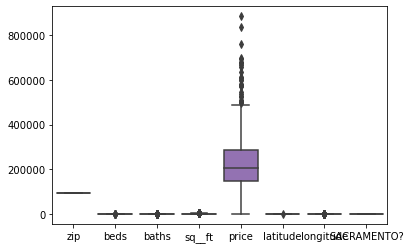

In [17]:
sns.boxplot(data= df) # seem ok

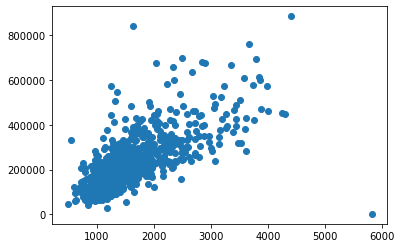

In [18]:
plt.scatter(df['sq__ft'],df['price'])

In [19]:
df.to_csv('./datasets/sacramento_real_estate_cleaned.csv',index=False)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [20]:
clean = pd.read_csv('./datasets/sacramento_real_estate_cleaned.csv')

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

<AxesSubplot:>

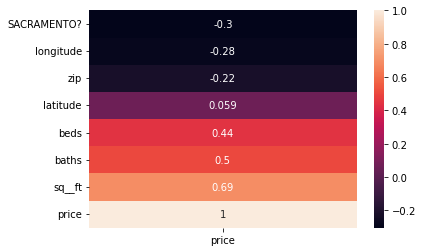

In [21]:
sns.heatmap(clean.corr()[['price']].sort_values(by='price'),annot=True)

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [22]:
# the sq__ft predictor should be the best predictor of Y, with the highest correlation

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [23]:
x_list = [i for i in clean['sq__ft']]
y_list = [i for i in clean['price']]

In [24]:
def inter_slope(x_list,y_list):
    r_xy = pd.DataFrame(data =[x_list,y_list]).T.corr()[1][0]
    s_x = np.std(x_list);
    s_y = np.std(y_list);
    slope = r_xy * (s_x/s_y)
    intercept = np.mean(y_list) - (slope*np.mean(x_list))
    return slope,intercept
slope,intercept = inter_slope(x_list,y_list)
print(f'slope :{slope}')
print(f'intercept:{intercept}')

slope :0.003842338924847401
intercept:229465.01378890825


### 6. Interpret the intercept and the slope.

In [25]:
#For every 1 unit increase in  sq__ft , expect the price  to increase by 0.0038431897116160767  .

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [26]:
#prediction - this model could use for predict the price value of dwelling by the size of area 

# inference - this model could use to infer the average price of dwelling 

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [27]:
y_preds = []
for i in x_list:
    y_preds.append(intercept+(slope*i))

In [28]:
df = pd.DataFrame(data =[y_list,y_preds]).T
df =df.rename(columns={0:'true_price',1:'pred_price'})
df['resids'] = df['true_price'] - df['pred_price']
#df.head()

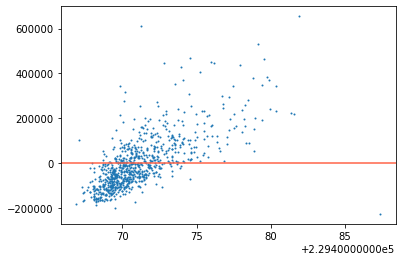

In [29]:
plt.scatter(x=df['pred_price'],y=df['resids'],s=1)
plt.axhline(0,color='tomato');

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [30]:
clean = pd.get_dummies(columns=['type'],drop_first=True,data = clean) 

In [31]:
clean = pd.get_dummies(columns=['street_type'],drop_first=True,data =clean)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [32]:
#type are including of condo, residental, multi-family ,so drop first make 2 columns left in the df.
clean.head(2)

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,...,street_type_CIR,street_type_CT,street_type_DR,street_type_LN,street_type_PKWY,street_type_PL,street_type_RD,street_type_ST,street_type_WAY,street_type_other
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,0,0,0,0,0,0,0,1,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,0,1,0,0,0,0,0,0,0,0


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

<AxesSubplot:>

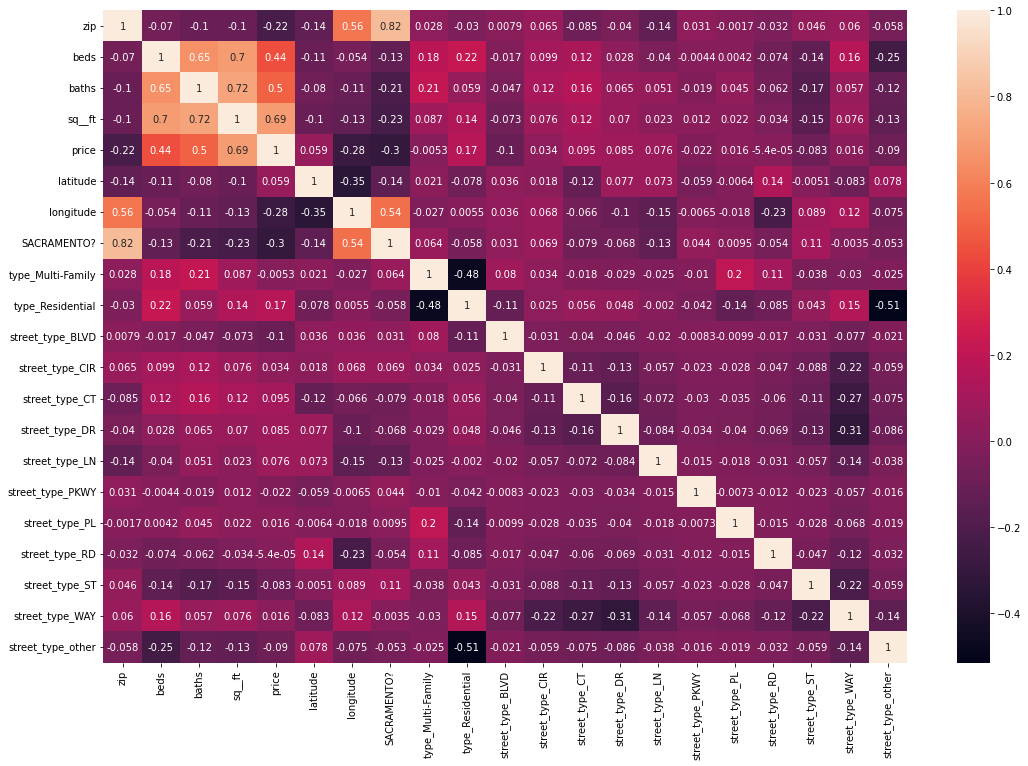

In [33]:
plt.figure(figsize=(18,12))
sns.heatmap(clean.corr(),annot=True)

In [34]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   street             813 non-null    object 
 1   city               813 non-null    object 
 2   zip                813 non-null    int64  
 3   state              813 non-null    object 
 4   beds               813 non-null    int64  
 5   baths              813 non-null    int64  
 6   sq__ft             813 non-null    int64  
 7   sale_date          813 non-null    object 
 8   price              813 non-null    int64  
 9   latitude           813 non-null    float64
 10  longitude          813 non-null    float64
 11  SACRAMENTO?        813 non-null    int64  
 12  type_Multi-Family  813 non-null    uint8  
 13  type_Residential   813 non-null    uint8  
 14  street_type_BLVD   813 non-null    uint8  
 15  street_type_CIR    813 non-null    uint8  
 16  street_type_CT     813 non

In [35]:
X = clean[['beds','baths','sq__ft','zip','type_Residential']]
y= clean['price']

In [36]:
#Instantiate
lr = LinearRegression()

# fit
lr.fit(X,y)
y_pred = lr.predict(X)


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

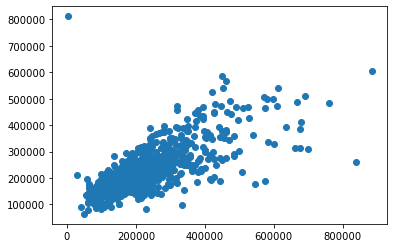

In [37]:
plt.scatter(x = y,y = y_pred)
# the true value and predict one seem not aligned, which mean not really accurate.

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

-------------- same as SLR model assumption ---------------
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)


-------------- except of SLR model assumption ---------------
- M - No Multicollinearity/Independence of Predictors

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

1.5096163990295632

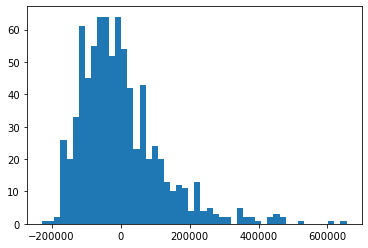

In [38]:
plt.hist(df['resids'], bins=50);
df['resids'].skew()

# The normally distributed errors doesn't pass on this model, since it is positive skew, right tail

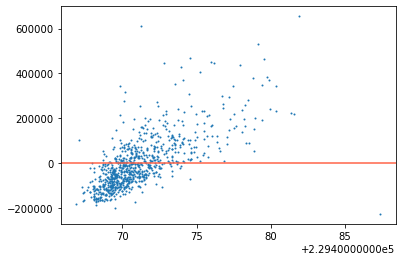

In [39]:
plt.scatter(x=df['pred_price'],y=df['resids'],s=1)
plt.axhline(0,color='tomato');

#E - Equal variance of errors also doesn't pass on this model , since the both side seem not equal variance

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [40]:
import statsmodels.api as sm
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              1322.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:36:00   Log-Likelihood:                         -10386.
No. Observations:                 813   AIC:                                  2.078e+04
Df Residuals:                     808   BIC:                                  2.081e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
beds             -1.535e+04   5287.506     -2.903      0.004   -2.57e+04   -4973.096
baths             7478.9582   6892.191      1.085      0.278   -6049.754     2.1e+04
sq__ft             131.3815      7.274     18.061      0.000     117.103     145.660
zip                  0.1819      0.160      1.134      0.257      -0.133       0.497
type_Residential  4.078e+04   1.25e+04      3.266      0.001    1.63e+04    6.53e+04
==============================================================================
Omnibus:                      214.746   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6873.621
Skew:                           0.490   Prob(JB):                         0.00
Kurtosis:                      17.211   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [41]:

def r2_adj(y,y_pred,X):
    adj_r = 1 - (1-metrics.r2_score(y, y_pred))*(len(y)-1)/ \
                                            (len(y)-len(X.columns)-1)
    return adj_r

r2_adj(y,y_pred,X)

0.5103798580247855

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [42]:
mse = metrics.mean_squared_error(y,y_pred)
r2 = metrics.r2_score(y,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y,y_preds))
print(f'mse : {mse}')
print(f'r2 : {r2}')
print(f'rmse : {rmse}')

# the rmse is really high and the r2 is too low.

mse : 6986554914.26624
r2 : 0.5133947603768496
rmse : 119822.047440457


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [43]:
clean.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft',
       'sale_date', 'price', 'latitude', 'longitude', 'SACRAMENTO?',
       'type_Multi-Family', 'type_Residential', 'street_type_BLVD',
       'street_type_CIR', 'street_type_CT', 'street_type_DR', 'street_type_LN',
       'street_type_PKWY', 'street_type_PL', 'street_type_RD',
       'street_type_ST', 'street_type_WAY', 'street_type_other'],
      dtype='object')

comparing by train/test score
Train R-squared score: 0.5160991152354168
Test R-squared score: 0.5239255553815199
-------------------------------------------
comparing by using cross_validation
Train cross_va score:0.45696842989164227
Test cross_va score:0.43393799024220014
-------------------------------------------
model RMSE: 71354.18775695036
model adjusted R2: 0.4776047986078299


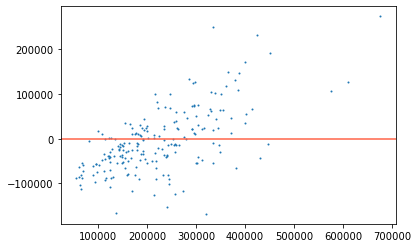

In [44]:
# set X,y
X = clean[['beds','baths','sq__ft','zip','type_Residential','type_Multi-Family','SACRAMENTO?','street_type_BLVD',
       'street_type_CIR', 'street_type_CT', 'street_type_DR', 'street_type_LN',
       'street_type_PKWY', 'street_type_PL', 'street_type_RD',
       'street_type_ST', 'street_type_WAY', 'street_type_other']]
y= clean['price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1000)

# Instantiate 
lr = LinearRegression()

# fit the train set for model
lr.fit(X_train,y_train)


# check score for decide 
# Train score
print('comparing by train/test score')
print(f'Train R-squared score: {lr.score(X_train,y_train)}')
# Test score
print(f'Test R-squared score: {lr.score(X_test,y_test)}')
print('-------------------------------------------')
print('comparing by using cross_validation')
print(f'Train cross_va score:{cross_val_score(lr,X_train,y_train).mean()}')
print(f'Test cross_va score:{cross_val_score(lr,X_test,y_test).mean()}')

# 
y_preds = lr.predict(X_test)

resids = y_test - y_preds
plt.scatter(y_test,resids,s=1)
plt.axhline(0,color='tomato')
print('-------------------------------------------')
print(f'model RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_preds))}')
print(f'model adjusted R2: {r2_adj(y_test,y_preds,X)}')


 - ### The train score is approx. equal to test score in both options (cross_validation and train/test r square) so it may in the sweet spot. Furthermore, the RMSE is lower than the first model.

### Dummyregressor

In [45]:
#Instantiate
dummy = DummyRegressor()

# fit
dummy.fit(X_train,y_train)

dummy_y_pred = dummy.predict(X_test)
dummy_y_pred
print(f'baseline rmse: {np.sqrt(metrics.mean_squared_error(y_test,dummy_y_pred))}') # the model has to has lower rmse than baseline
print(f'baseline score : {dummy.score(X_test,y_test)}') # the baseline score can be negative, since there are a lot of outliers in data.

baseline rmse: 103686.70224697156
baseline score : -0.005268466574984032


#### The lastest model have lower in rmse than baseline score and higher in r2 than baseline, so this model is permitted

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

In [46]:
# The model is in sweet spot because the Train score is approx. equal to test score